# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2.Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3.Evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4.Features
**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# Preparing the tools
* Getting Ready To **Analysis**

We're going to use `pandas`, `Matplotlib` and `NumPy` for data analysis and manipulation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

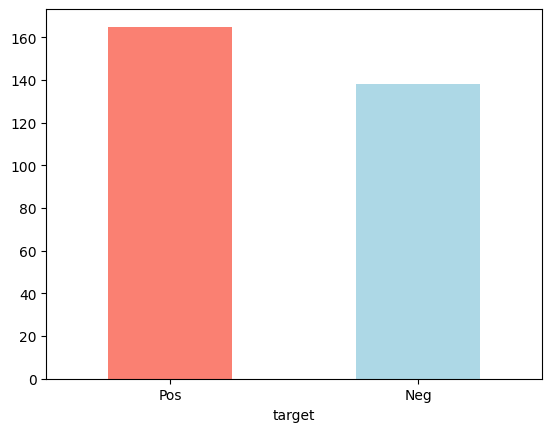

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.xticks([0, 1],labels=["Pos", "Neg"], rotation=0);

* Using **Correlation Matrix** To See Relation Between Features and Target

In [9]:
corr_mat = df.corr()

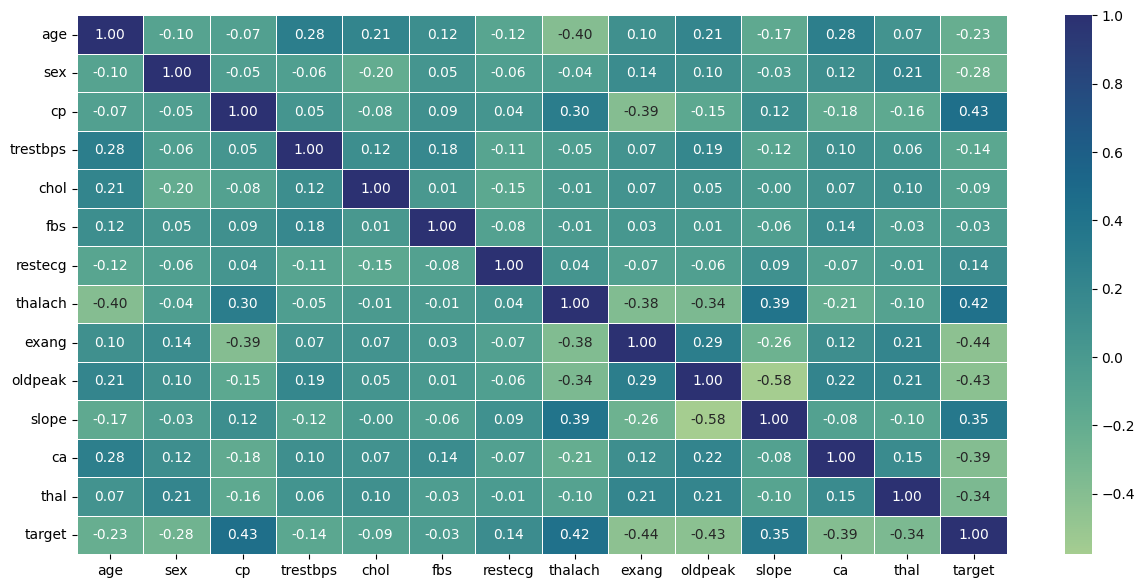

In [10]:
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.heatmap(data=corr_mat, 
                 annot=True, 
                 cmap="crest", 
                 fmt=".2f", 
                 linewidth=.5)

We have 3 relation here based on the **correlation coefficient** :

* where the coefficient is close to : 
    * 1 it means 2 variables have **Direct relationship**
    * 0 it means 2 variables have not **affect in each other**
    * -1 it means 2 vaiables have **Reverse relationship**

#### Now Let's Focus On **Target** And it's relation with Features

sex - (1 = male; 0 = female)

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

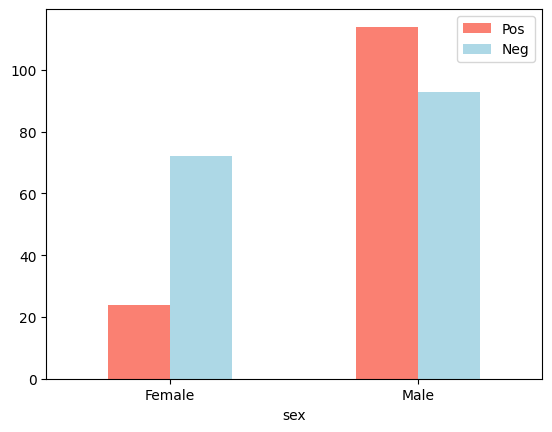

In [13]:
pd.crosstab(df.sex, df.target).plot(kind="bar", color=["salmon", "lightblue"])
plt.legend(["Pos", "Neg"])
plt.xticks([0, 1], ["Female", "Male"], rotation=0);

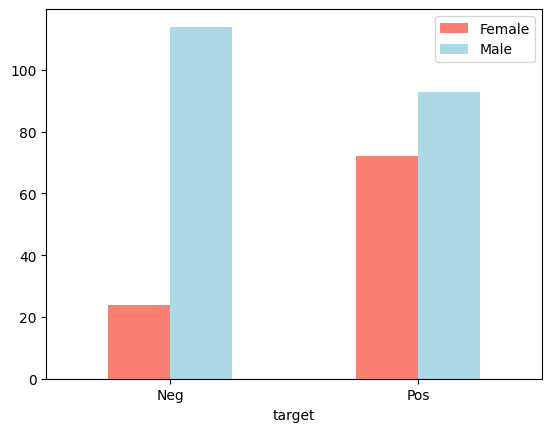

In [14]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"])
plt.legend(["Female", "Male"])
plt.xticks([0, 1], ["Neg", "Pos"], rotation=0);

Count Of Females are **less** than males , **But** most of them are infected (females)

* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

**Angina** (an-JIE-nuh or AN-juh-nuh) is a type of chest pain caused by reduced blood flow to the heart.

In [15]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


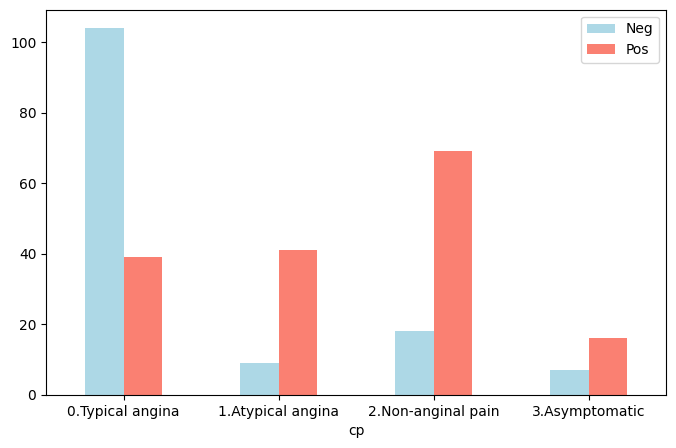

In [17]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["lightblue", "salmon"], figsize=(8,5))
plt.legend(["Neg", "Pos"])
plt.xticks([0, 1, 2, 3],["0.Typical angina", "1.Atypical angina", "2.Non-anginal pain", "3.Asymptomatic"], rotation=0);

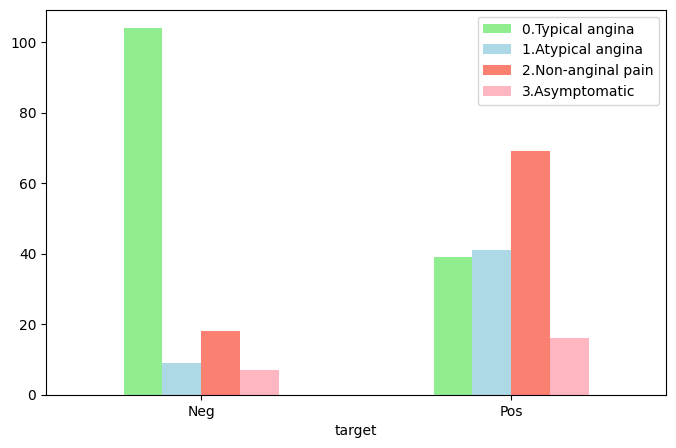

In [18]:
pd.crosstab(df.target, df.cp).plot(kind="bar", color=["lightgreen", "lightblue", "salmon", "lightpink"], figsize=(8,5))
plt.legend(["0.Typical angina", "1.Atypical angina", "2.Non-anginal pain", "3.Asymptomatic"])
plt.xticks([0, 1], ["Neg", "Pos"], rotation=0);

As we can see from relation **chest pain** and **target**, in **positive** case we have a **rising** slope

* thalach - maximum heart rate achieved

In [19]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

it's better using **scatter** plot analyse, explore relation with **age**

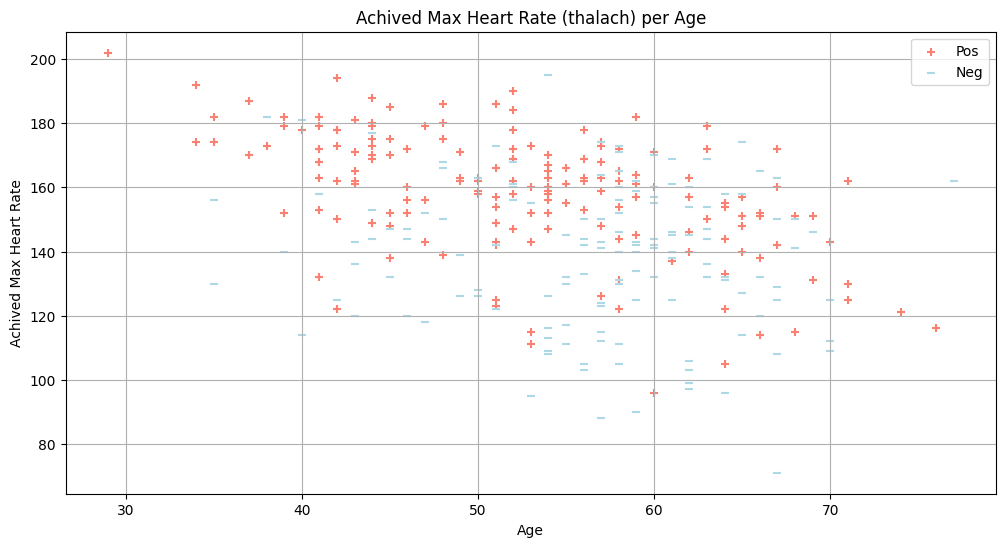

In [20]:
fig, ax = plt.subplots(figsize=(12,6),)

pos_cases = df["target"] == 1

x = df[pos_cases]["age"]
y = df[pos_cases]["thalach"]
ax = plt.scatter(x, y, c="salmon", marker="+")

neg_cases = df["target"] == 0

x = df[neg_cases]["age"]
y = df[neg_cases]["thalach"]
ax = plt.scatter(x, y, c="lightblue", marker="_")

plt.xlabel("Age")
plt.ylabel("Achived Max Heart Rate")
plt.title("Achived Max Heart Rate (thalach) per Age")

plt.legend(["Pos", "Neg"])
plt.grid()
plt.plot();

What we figure it out is when the **Age** goes up, the amount of **Thalach** will go down

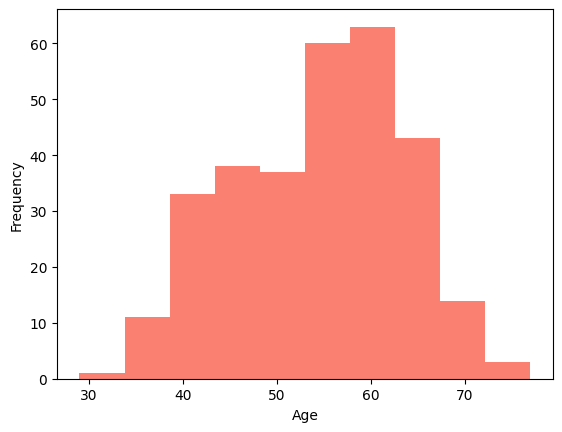

In [21]:
df.age.plot(kind="hist", color=["salmon"])
plt.xlabel("Age");

most of the people are around **55** till **63** years old, we also have some outliers.

In [22]:
min_age = np.min(df["age"])
max_age = np.max(df["age"])

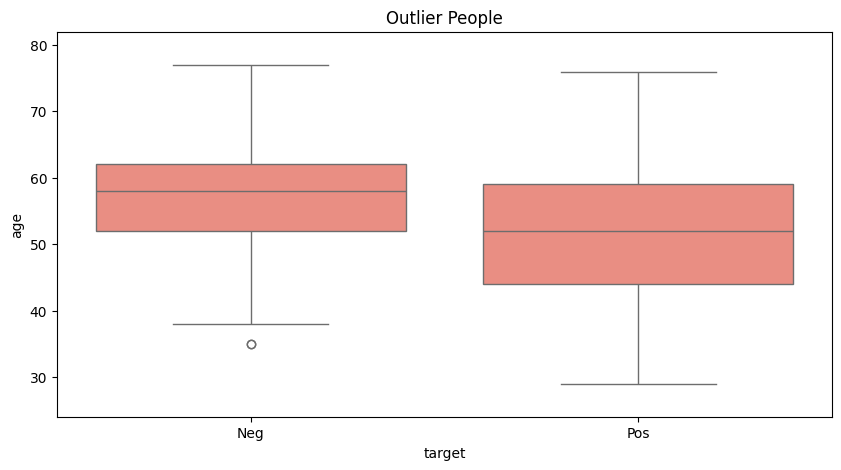

In [23]:
plt.figure(figsize=(10,5))

plt.ylim(min_age - 5, max_age + 5)
sns.boxplot(x='target', y='age',data=df, color="salmon")

plt.xticks([0, 1], ["Neg", "Pos"], rotation=0)

plt.title("Outlier People")
plt.show()

slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

In [30]:
pd.crosstab(df["target"], df["slope"])

slope,0,1,2
target,,,
0,12,91,35
1,9,49,107


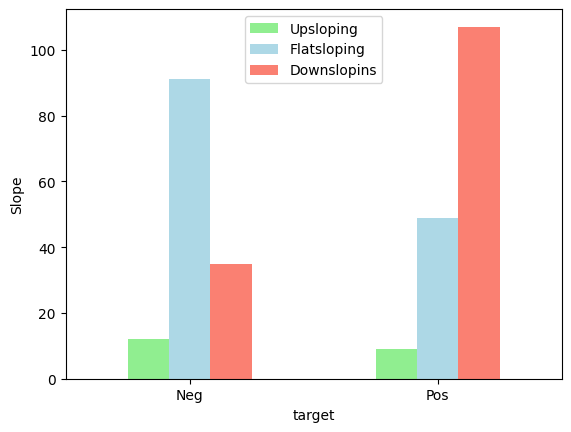

In [36]:
pd.crosstab(df["target"], df["slope"]).plot(kind="bar", color=["lightgreen", "lightblue", "salmon"])
plt.legend(["Upsloping", "Flatsloping", "Downslopins"]);
plt.xticks([0, 1], ["Neg", "Pos"], rotation=0)
plt.ylabel("Slope");

# Start To Modeling

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
X = df.drop("target", axis=1)
y = df["target"]

In [27]:
len(X), len(y)

(303, 303)

In [28]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Choosing Estimators

because our problem is classification one, we can take a look at *https://scikit-learn.org/stable/_static/ml_map.png*

In [106]:
import warnings
# run block of code and catch warnings
with warnings.catch_warnings():
 # ignore all caught warnings
 warnings.filterwarnings("ignore")

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

In [107]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [128]:
np.random.seed(42)

def train_models(clf_models_list: list, X_train, X_test, y_train, y_test):
    """ This Func Make Model Automaticaly And Report The Functionality """
    result = []
    
    for model in clf_models_list:
        model["clf"].fit(X_train, y_train)
        result.append({model["name"] :f"{model['clf'].score(X_test, y_test) * 100:.2f}%"})

    print(result)
    return result

In [129]:
np.random.seed(42)
the_estimators = [
    {
        "name": LinearSVC.__name__,
        "clf": LinearSVC()
    },
    {
        "name": KNeighborsClassifier.__name__,
        "clf": KNeighborsClassifier()
    },
    {
        "name": SVC.__name__,
        "clf": SVC()
    },
    {
        "name": RandomForestClassifier.__name__,
        "clf": RandomForestClassifier()
    },
    {
        "name": LogisticRegression.__name__,
        "clf": LogisticRegression()
    }
]
models_scores = train_models(the_estimators, X_train, X_test, y_train, y_test);

[{'LinearSVC': '86.89%'}, {'KNeighborsClassifier': '68.85%'}, {'SVC': '70.49%'}, {'RandomForestClassifier': '83.61%'}, {'LogisticRegression': '88.52%'}]


/Users/hamidba/Documents/MLProjects/heart-disease-project/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidba/Documents/MLProjects/heart-disease-project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [171]:
cols = []
rows = []
for model in models_scores:
    cols.append(list(model.keys())[0])
    score_int = float(str(list(model.values()[0])).replace("%", ""))
    rows.append(score_int)

models_pd = pd.DataFrame(columns=cols,index=["Score"])
models_pd["LinearSVC"] = rows[0]
models_pd["KNeighborsClassifier"] = rows[1]
models_pd["SVC"] = rows[2]
models_pd["RandomForestClassifier"] = rows[3]
models_pd["LogisticRegression"] = rows[4]

models_pd

TypeError: 'dict_values' object is not subscriptable

In [169]:
models_pd.plot(kind="bar")

TypeError: no numeric data to plot

as we can see, Obviously **KNC** & **SVC** Scores are ***less*** than others, so we can pure them now and focus on **LinearSVC**, **Ensemble CLF** and **Logistic Regression**